In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv("vgsales.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
data.shape

(16598, 11)

In [6]:
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
data['Year'].dtype

dtype('float64')

In [8]:
data['Year'].fillna(value=1995,inplace=True)


In [9]:
data['Year']=data['Year'].astype(dtype='int32',inplace=True)
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

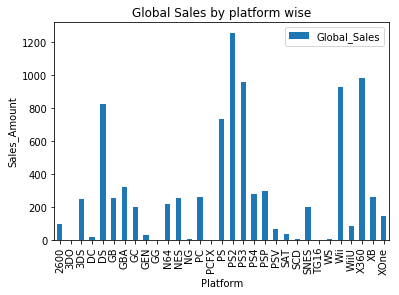

In [11]:
#Global Sales by platform wise

((data[['Platform','Global_Sales']]).groupby(by=['Platform']).sum()).plot(kind='bar')
plt.ylabel("Sales_Amount")
plt.title("Global Sales by platform wise")
plt.show()


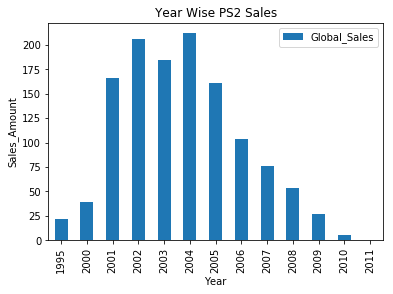

In [12]:
#Inwhich year PS2 has highest sales
((data[data['Platform']=='PS2'][['Year','Global_Sales']]).groupby(by=['Year']).sum()).plot(kind='bar')
plt.ylabel("Sales_Amount")
plt.title("Year Wise PS2 Sales")
plt.show()

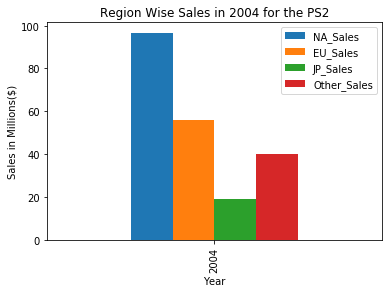

In [13]:
((data[ (data['Year']==2004) &(data['Platform']=='PS2')][['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]).groupby(by='Year').sum()).plot(kind='bar')
plt.ylabel("Sales in Millions($)")
plt.title("Region Wise Sales in 2004 for the PS2")
plt.show()


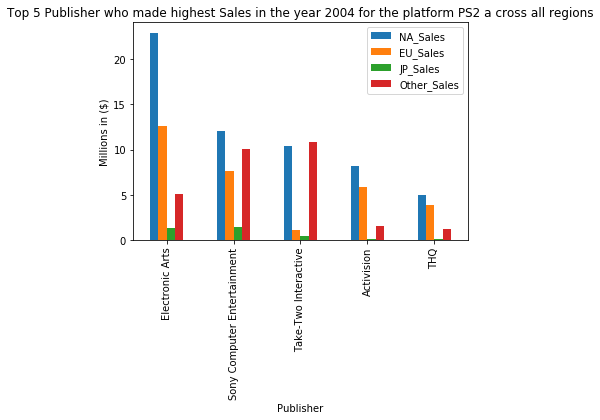

In [14]:
((data[ (data['Year']==2004) &(data['Platform']=='PS2')][['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]).groupby(by='Publisher').sum()).sort_values(by=['NA_Sales'],ascending=False).head(5).plot(kind='bar')
plt.ylabel("Millions in ($)")
plt.title("Top 5 Publisher who made highest Sales in the year 2004 for the platform PS2 a cross all regions")
plt.show()

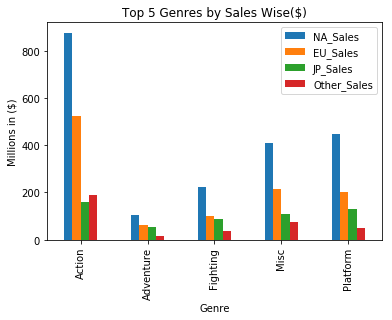

In [15]:
(data[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]).groupby(by=['Genre']).sum().head(5).plot(kind='bar')
plt.ylabel("Millions in ($)")
plt.title("Top 5 Genres by Sales Wise($)")
plt.show()

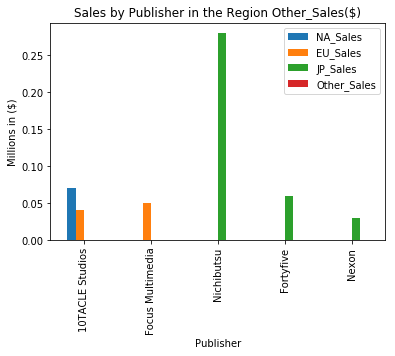

In [16]:
data[['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(by='Publisher').sum().sort_values(by='Other_Sales',ascending=True).head(5).plot(kind='bar')
plt.ylabel("Millions in ($)")
plt.title("Sales by Publisher in the Region Other_Sales($)")
plt.show()


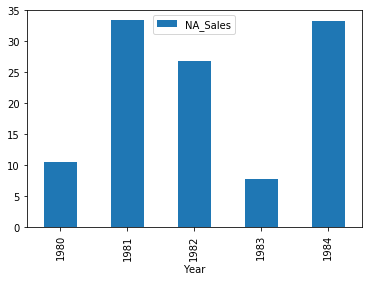

In [18]:
data[['Year','NA_Sales']].groupby(by='Year').sum().head(5).plot(kind='bar')
plt.show()

In [21]:
data.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16598.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.220207,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.959192,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000
